In [1]:
%run MachineLearningFunctions.py
from __future__ import division

In [328]:
categories = ["sample_num", "clump_thickness", "cellsize_uniformity", "cellshape_uniformity", "marginal_adhesion", "single_epithelial_cellsize", "bare_nuclei", "bland_chromatin", "normal_nucleoli", "Mitoses", "Class"]
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",  names= categories)
data['Class'] = data['Class'].map({2: 0, 4: 1})
data = data.dropna()
data = data[data.bare_nuclei != '?']
data = data.astype(int)
data = data.as_matrix() 


min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)
data_features = [row[0:10] for row in data]
data_class = [row[10] for row in data]
benign_data = [row for row in data if row[10] == 0]
malignant_data = [row for row in data if row[10] == 1]
benign_features = [row[0:10] for row in benign_data]
benign_target = [row[10] for row in benign_data]
malignant_features = [row[0:10] for row in malignant_data]
malignant_target = [row[10] for row in malignant_data]
b_train,b_test,tar_b_train,tar_b_test=train_test_split(benign_features,benign_target,test_size=0.111, train_size = 0.339, random_state = 7)
m_train,m_test,tar_m_train,tar_m_test=train_test_split(malignant_features,malignant_target,test_size=0.209, train_size = 0.631, random_state = 7)
train_features = b_train + m_train
train_target = tar_b_train + tar_m_train
test_features = b_test + m_test
test_target = tar_b_test + tar_m_test

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [196]:
#class_machines = [("KNNC", [8]), ("RFC", [.04]) , ("SVC", ['linear']) ]
#prob_machines =  [("KNNR", [8]), ("RFR", [.04]) , ("SVR", ['linear']) ]

In [329]:
class_machines = [("KNNC", [8,10,12,14,16,18,20,22]), ("RFC", [.04,.08,.12,.16,.20,0.24, 0.28]) , ("SVC", ['linear', 'rbf', 'poly']) ]
prob_machines =  [("KNNR", [8,10,12,14,16,18,20,22]), ("RFR", [.04,.08,.12,.16,.20,0.24, 0.28]) , ("SVR", ['linear', 'rbf', 'poly']) ]

In [295]:
#class_machines = [("KNNC", [8,10,12,14]), ("RFC", [.04,.08,.12,.16]) , ("SVC", ['linear', 'rbf']) ]
#prob_machines =  [("KNNR", [8,10,12,14]), ("RFR", [.04,.08,.12,.16]) , ("SVR", ['linear', 'rbf']) ]

In [32]:
class_errors_dict =  OPTIMAL_CLASSIFIER(train_features, train_target, test_features, test_target, class_machines, SYN=False)

TRAINING CELL OUTCOMES
{0: 2, 1: 143, 2: 105, 3: 2, 4: 1, 5: 1, 6: 42, 7: 1, 8: 1, 9: 2}


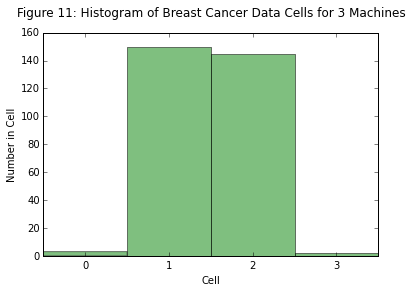

In [41]:
fig, ax = plt.subplots()

cell_dict = {0: 3, 1: 150, 2: 145, 3: 2}
cell_list = []
for key in cell_dict:
    for x in range (0, cell_dict[key]):
        cell_list.append(key)
        



plt.xticks(np.arange(0, 4, 1.0))
ax.hist(cell_list, align='left', bins=range(min(cell_list), max(cell_list) + 2, 1), alpha=0.5, color='green' )
ax.set_ylabel("Number in Cell")
ax.set_xlabel("Cell")
title = plt.title("Figure 11: Histogram of Breast Cancer Data Cells for 3 Machines")
title.set_position([0.5, 1.05])
fig.savefig("/Users/battogtokhb/Documents/Notebooks/Graphics/Figures/11_figure", dpi=600)
fig.show()


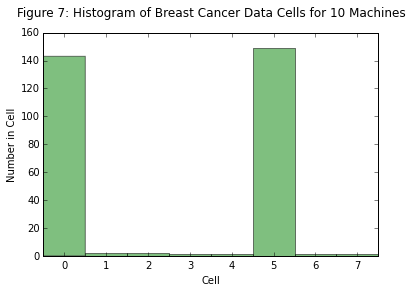

In [42]:
fig, ax = plt.subplots()

cell_dict = {0: 143, 1: 2, 2: 2, 3: 1, 4: 1, 5: 149, 6: 1, 7: 1}
cell_list = []
for key in cell_dict:
    for x in range (0, cell_dict[key]):
        cell_list.append(key)
        



plt.xticks(np.arange(0, 8, 1.0))
ax.hist(cell_list, align='left', bins=range(min(cell_list), max(cell_list) + 2, 1), alpha=0.5, color='green' )
ax.set_ylabel("Number in Cell")
ax.set_xlabel("Cell")
title = plt.title("Figure 7: Histogram of Breast Cancer Data Cells for 10 Machines")
title.set_position([0.5, 1.05])
fig.savefig("/Users/battogtokhb/Documents/Notebooks/Graphics/Figures/7_figure", dpi=600)
fig.show()


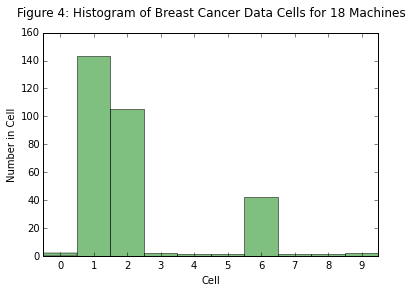

In [148]:
fig, ax = plt.subplots()

cell_dict = {0: 2, 1: 143, 2: 105, 3: 2, 4: 1, 5: 1, 6: 42, 7: 1, 8: 1, 9: 2}
cell_list = []
for key in cell_dict:
    for x in range (0, cell_dict[key]):
        cell_list.append(key)
        



plt.xticks(np.arange(-1, 10, 1.0))
ax.hist(cell_list, align='left', bins=range(min(cell_list), max(cell_list) + 2, 1), alpha=0.5, color='green' )
ax.set_ylabel("Number in Cell")
ax.set_xlabel("Cell")
title = plt.title("Figure 4: Histogram of Breast Cancer Data Cells for 18 Machines")
title.set_position([0.5, 1.05])
fig.savefig("/Users/battogtokhb/Documents/Notebooks/Graphics/Figures/4_figure", dpi=600)
fig.show()


In [330]:
cv_features = malignant_features[0:200] + benign_features[0:200]
cv_target = malignant_target[0:200] + benign_target[0:200]

In [331]:
import random
c = list(zip(cv_features,cv_target))

random.shuffle(c)

shuffled_features, shuffled_class = zip(*c)

In [332]:
cross_val_dict_class = cross_val(shuffled_features, shuffled_class, class_machines)
cross_val_dict_prob = cross_val(shuffled_features, shuffled_class, prob_machines, VERBOSE=True)


KNNR 8 VALUES:  [0.012499999999999956, 0.050000000000000044, 0.050000000000000044, 0.0625, 0.050000000000000044] VARIANCE:  0.0189571886101
KNNR 10 VALUES:  [0.025000000000000022, 0.037499999999999978, 0.050000000000000044, 0.037499999999999978, 0.050000000000000044] VARIANCE:  0.0104582503317
KNNR 12 VALUES:  [0.012499999999999956, 0.037499999999999978, 0.050000000000000044, 0.037499999999999978, 0.050000000000000044] VARIANCE:  0.0153093108924
KNNR 14 VALUES:  [0.037499999999999978, 0.037499999999999978, 0.0625, 0.037499999999999978, 0.050000000000000044] VARIANCE:  0.0111803398875
KNNR 16 VALUES:  [0.037499999999999978, 0.037499999999999978, 0.0625, 0.037499999999999978, 0.050000000000000044] VARIANCE:  0.0111803398875
KNNR 18 VALUES:  [0.037499999999999978, 0.037499999999999978, 0.074999999999999956, 0.050000000000000044, 0.050000000000000044] VARIANCE:  0.0153093108924
KNNR 20 VALUES:  [0.037499999999999978, 0.037499999999999978, 0.074999999999999956, 0.050000000000000044, 0.05000

In [333]:
oc_classifier_class_nosyn =  OPTIMAL_CV(shuffled_features, shuffled_class, class_machines, SYN=False) 
oc_classifier_class_syn =  OPTIMAL_CV(shuffled_features, shuffled_class, class_machines, SYN=True) 



TRAINING CELL OUTCOMES
{0: 4, 1: 1, 2: 152, 3: 109, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 42, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1}
TRAINING CELL OUTCOMES
{0: 2, 1: 1, 2: 142, 3: 118, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 42, 14: 1, 15: 1, 16: 1, 17: 2, 18: 1}
TRAINING CELL OUTCOMES
{0: 1, 1: 148, 2: 1, 3: 117, 4: 1, 5: 1, 6: 1, 7: 2, 8: 39, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1}
TRAINING CELL OUTCOMES
{0: 5, 1: 1, 2: 157, 3: 100, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 48, 12: 1, 13: 1}
TRAINING CELL OUTCOMES
{0: 3, 1: 151, 2: 1, 3: 112, 4: 1, 5: 1, 6: 1, 7: 2, 8: 40, 9: 1, 10: 1, 11: 1, 12: 2, 13: 1, 14: 1, 15: 1}
TRAINING CELL OUTCOMES
{0: 1, 1: 1, 2: 153, 3: 155, 4: 1, 5: 1, 6: 1, 7: 1, 8: 3, 9: 3}
TRAINING CELL OUTCOMES
{0: 146, 1: 164, 2: 1, 3: 1, 4: 4, 5: 2, 6: 1, 7: 1}
TRAINING CELL OUTCOMES
{0: 6, 1: 151, 2: 160, 3: 1, 4: 2}
TRAINING CELL OUTCOMES
{0: 158, 1: 2, 2: 150, 3: 1, 4: 1, 5: 1, 6: 3, 7: 1, 8: 1, 9: 1, 10: 1}


In [334]:
oc_classifier_prob_nosyn =  OPTIMAL_CV(shuffled_features, shuffled_class, prob_machines, classifier=True, SYN=False) 
oc_classifier_prob_syn =  OPTIMAL_CV(shuffled_features, shuffled_class, prob_machines, classifier=True, SYN=True) 

TRAINING CELL OUTCOMES
{0: 5, 1: 1, 2: 151, 3: 104, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 38, 14: 6, 15: 1, 16: 1, 17: 1, 18: 2, 19: 1}
TRAINING CELL OUTCOMES
{0: 2, 1: 1, 2: 1, 3: 141, 4: 118, 5: 1, 6: 3, 7: 1, 8: 1, 9: 1, 10: 1, 11: 34, 12: 4, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 5, 19: 1}
TRAINING CELL OUTCOMES
{0: 4, 1: 2, 2: 142, 3: 120, 4: 1, 5: 1, 6: 1, 7: 8, 8: 30, 9: 2, 10: 2, 11: 1, 12: 1, 13: 1, 14: 4}
TRAINING CELL OUTCOMES
{0: 7, 1: 154, 2: 1, 3: 99, 4: 2, 5: 1, 6: 1, 7: 1, 8: 43, 9: 1, 10: 1, 11: 4, 12: 1, 13: 2, 14: 1, 15: 1}
TRAINING CELL OUTCOMES
{0: 3, 1: 151, 2: 112, 3: 1, 4: 2, 5: 1, 6: 1, 7: 1, 8: 34, 9: 1, 10: 4, 11: 1, 12: 1, 13: 2, 14: 1, 15: 1, 16: 2, 17: 1}
TRAINING CELL OUTCOMES
{0: 1, 1: 1, 2: 155, 3: 154, 4: 3, 5: 1, 6: 1, 7: 1, 8: 3}
TRAINING CELL OUTCOMES
{0: 149, 1: 1, 2: 166, 3: 1, 4: 1, 5: 1, 6: 1}
TRAINING CELL OUTCOMES
{0: 1, 1: 154, 2: 160, 3: 1, 4: 3, 5: 1}
TRAINING CELL OUTCOMES
{0: 161, 1: 151, 2: 1, 3: 1, 4: 1, 5: 3, 6: 

In [335]:
def SLM_CLASSIFIER(train_features, train_target, test_features, test_target, machines, VERBOSE=False, CV=True):
    
    functions_dict = {'KNNC': KNNC, 'RFC': RFC, 'SVC': SVC, 'KNNR': KNNR, 'RFR': RFR, 'SVR': SVR}
    
    #Generate synthetic features for training and testing -> final = original features + synthetic 

    final_train_features = train_features
    for machine_name, machine_settings in machines:
            for machine_setting in machine_settings:
            #print functions_dict[machine_name](machine_setting, train_features )
                if VERBOSE:
                    print machine_name, machine_setting, "train sf"
                final_train_features =  np.column_stack( (final_train_features, np.reshape(functions_dict[machine_name](machine_setting, train_features,  train_target,train_features,test_target ), len(train_features ), 1))  )

        

    final_test_features = test_features
    for machine_name, machine_settings in machines:
            for machine_setting in machine_settings:
                    if VERBOSE:
                        print machine_name, machine_setting, "test sf"
                    final_test_features =  np.column_stack( (final_test_features, np.reshape(functions_dict[machine_name](machine_setting, train_features, train_target,test_features,test_target), len(test_features ), 1))  )

    final_machine = RandomForestClassifier(min_weight_fraction_leaf=0.12)
    final_machine = final_machine.fit(final_train_features, train_target)
    final_prediction = final_machine.predict(final_test_features)
    
    if CV:
        return 1 - sklearn.metrics.accuracy_score(test_target,final_prediction)

    

In [336]:
def SLM_REGRESSOR(train_features, train_target, test_features, test_target, machines, VERBOSE=False, CV=True):
    
    functions_dict = {'KNNC': KNNC, 'RFC': RFC, 'SVC': SVC, 'KNNR': KNNR, 'RFR': RFR, 'SVR': SVR}
    
    #Generate synthetic features for training and testing -> final = original features + synthetic 

    final_train_features = train_features
    for machine_name, machine_settings in machines:
            for machine_setting in machine_settings:
            #print functions_dict[machine_name](machine_setting, train_features )
                if VERBOSE:
                    print machine_name, machine_setting, "train sf"
                final_train_features =  np.column_stack( (final_train_features, np.reshape(functions_dict[machine_name](machine_setting, train_features,  train_target,train_features,test_target ), len(train_features ), 1))  )

        

    final_test_features = test_features
    for machine_name, machine_settings in machines:
            for machine_setting in machine_settings:
                    if VERBOSE:
                        print machine_name, machine_setting, "test sf"
                    final_test_features =  np.column_stack( (final_test_features, np.reshape(functions_dict[machine_name](machine_setting, train_features, train_target,test_features,test_target), len(test_features ), 1))  )

    final_machine = RandomForestRegressor(min_weight_fraction_leaf=0.12)
    final_machine = final_machine.fit(final_train_features, train_target)
    final_prediction = final_machine.predict(final_test_features)
    final_prediction_scale = probability_to_classification(final_prediction)
    
    if CV:
        return 1 - sklearn.metrics.accuracy_score(test_target,final_prediction_scale)



In [337]:
def SLM_CV(features, target, machines, classifier=True, VERBOSE=False):
    kf = KFold(len(features), n_folds=5)
    error_list = []
    for train_index, test_index in kf:
       
        train_features, train_target =  np.array(features)[train_index], np.array(target)[train_index]
        test_features, test_target = np.array(features)[test_index], np.array(target)[test_index]
        if classifier:
            error_list.append(SLM_CLASSIFIER(train_features, train_target, test_features, test_target, machines, CV=True))
        else:
            error_list.append(SLM_REGRESSOR(train_features, train_target, test_features, test_target, machines, CV=True))
            
    name = "Synthetic Learning Machine" 
    mean = np.mean(error_list)
    difference = [(x-mean)**2 for x in error_list]
    sum_difference = sum(difference)
    sum_difference = sum_difference / (5-1)
    variance = sqrt(sum_difference)
    cv_dict = {}
    cv_dict[name] = [np.mean(error_list), variance]
    return cv_dict


In [338]:
slm_class = SLM_CV(shuffled_features, shuffled_class, class_machines, classifier=True)
slm_prob = SLM_CV(shuffled_features, shuffled_class, prob_machines, classifier=False)

In [339]:
def merge_dicts(*dict_args):
    '''
    Given any number of dicts, shallow copy and merge into a new dict,
    precedence goes to key value pairs in latter dicts.
    '''
    result = {}
    for dictionary in dict_args:
        result.update(dictionary)
    return result


In [340]:
cv_dict_class = merge_dicts(cross_val_dict_class, oc_classifier_class_nosyn, oc_classifier_class_syn)
cv_dict_prob = merge_dicts (cross_val_dict_prob, oc_classifier_prob_nosyn, oc_classifier_prob_syn)

In [341]:
cv_dict_class = merge_dicts(cv_dict_class, slm_class)
cv_dict_prob = merge_dicts(cv_dict_prob, slm_prob)


In [342]:
def cross_val_four_graphs(cross_val_dict_class,cross_val_dict_prob,   title='', text='', label='', SAVE=False):
 
    cross_val_dict_class = OrderedDict(sorted(cross_val_dict_class.items(), key=lambda t: float(t[0].split(' ')[2] ) if t[0].split(' ')[2].isalpha() == False else t[0].split(' ')[2].swapcase()  ))
    cross_val_dict_prob = OrderedDict(sorted(cross_val_dict_prob.items(), key=lambda t: float(t[0].split(' ')[2] ) if t[0].split(' ')[2].isalpha() == False else t[0].split(' ')[2].swapcase()  ))


    
    f, (ax, ax1) = plt.subplots(1, 2, figsize=(14,4.5), sharey=False, sharex=False)
    color = plt.get_cmap('Dark2')
    cNorm  = colors.Normalize(vmin=0, vmax= len(cross_val_dict_class))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap= color)
    dict_x = range(len(cross_val_dict_class))
    

    dict_list =  [ cross_val_dict_prob, cross_val_dict_class,]
    ax_list = [ax, ax1]
    for dict_, ax_ in zip(dict_list, ax_list):
            marker = cycle(('v', 'd', '^', '>', 'p'))
            for i in range(len(dict_)):
                colorVal = scalarMap.to_rgba(i)
                if dict_.keys()[i] == "Optimal Crowd Classifier SYN=False":
                    ax_.errorbar(dict_x[i], dict_.values()[i][0], yerr=dict_.values()[i][1],  ms=13, marker = '*', mfc='red', ecolor='red', color='red', elinewidth= 1, label=dict_.keys()[i],  lw = 0.5)
                elif dict_.keys()[i] == "Optimal Crowd Classifier SYN=True":
                    ax_.errorbar(dict_x[i], dict_.values()[i][0], yerr=dict_.values()[i][1], ms=13, marker = '*', mfc='blue', ecolor='blue', color='blue', elinewidth= 1,label=dict_.keys()[i], lw = 0.5)
                elif dict_.keys()[i] == "Optimal Crowd Regressor SYN=False":
                    ax_.errorbar(dict_x[i], dict_.values()[i][0],yerr=dict_.values()[i][1],  ms=10, marker = 'o', mfc='red', ecolor='red', color='red', elinewidth= 1,label=dict_.keys()[i], lw = 0.5)
                elif dict_.keys()[i] == "Optimal Crowd Regressor SYN=True":
                    ax_.errorbar(dict_x[i], dict_.values()[i][0],yerr=dict_.values()[i][1],  ms=10, marker = 'o', mfc='blue', ecolor='blue', color='blue', elinewidth= 1,label=dict_.keys()[i], lw = 0.5)
                elif dict_.keys()[i] == "Synthetic Learning Machine":
                    ax_.errorbar(dict_x[i], dict_.values()[i][0], yerr=dict_.values()[i][1],  ms=10, marker = 'o', mfc='green', ecolor='green', color='green', elinewidth= 1,label=dict_.keys()[i], lw = 0.5)
                else:
                    ax_.errorbar(dict_x[i], dict_.values()[i][0],yerr=dict_.values()[i][1],  ms=11, marker = next(marker), mfc=colorVal, ecolor=colorVal, color=colorVal, elinewidth=1, label=dict_.keys()[i], lw = 0.5)
   
   
    ax1.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_major_formatter(NullFormatter())
    
    
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    handles = [h[0] for h in handles]
# use them in the legend
    
    
    art1 = ax.legend(handles, labels, loc=10, bbox_to_anchor=(1.1, -0.4), ncol=3, fontsize='large', numpoints=1)
    art2 = f.suptitle(title, fontsize=14, y=1.05)
    ax.axis("tight")
    
    ax.set_ylabel('Percent Error', fontsize=12)
    ax1.set_ylabel('Percent Error', fontsize=12)
    ax1.set_title('3b. ' + 'Pure Classification', fontsize=12)
    ax.set_title('3a. ' + 'Classification Based on Probability', fontsize=12)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=0.5)
      
    ax.set_ylim([0,0.14])
    ax1.set_ylim([0,0.14])
    
    major_ticks = np.arange(0, 0.16, 0.02)                                              
    minor_ticks = np.arange(0, 0.16, 0.01)  
    
    ax.set_yticks(major_ticks)                                                       
    ax.set_yticks(minor_ticks, minor=True) 
    
    ax1.set_yticks(major_ticks)                                                       
    ax1.set_yticks(minor_ticks, minor=True) 
    ax.grid(which='minor', alpha=0.4)                                                
    ax.grid(which='major', alpha=0.6)      
    ax.xaxis.set_ticks(range(20))
    
    ax1.grid(which='minor', axis='both', alpha=0.4)                                                
    ax1.grid(which='major', alpha=0.6)      
    
    ax1.set_xlim([-1,len(cross_val_dict_class)])
    ax.set_xlim([-1,len(cross_val_dict_class)])
    ax1.xaxis.set_ticks(range(len(cross_val_dict_class)))
    ax.xaxis.set_ticks(range(len(cross_val_dict_class)))
    
    

    #ax3.set_ylabel('Mean Squared Error', fontsize=12)
    #ax4.set_ylabel('Mean Squared Error', fontsize=12)
    if SAVE:
        f.savefig('/Users/battogtokhb/Documents/Notebooks/Graphics/Figures/2_figure', dpi=600, bbox_extra_artists= (art1,art2,),  bbox_inches='tight')
   
 
    f.show()

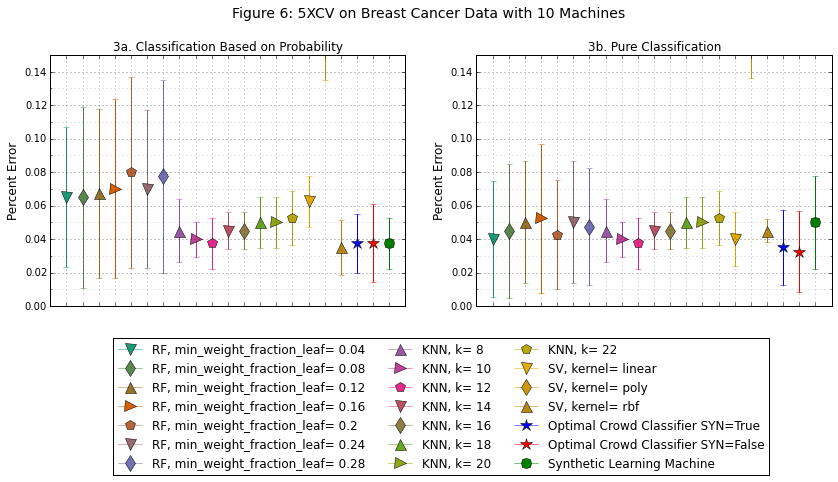

In [343]:
cross_val_four_graphs(cv_dict_class, cv_dict_prob, title='Figure 6: 5XCV on Breast Cancer Data with 10 Machines', text=text,  label='d', SAVE=False)